# Part 1  - Kinetics

### In these exercises, you will use and analyze the Smoluchowski equation for a double-well potential in 1 dimension to study the evolution of probability density and to compute rates.

### To study the dynamics on a potential, we must first write a function that computes the potential energy $U(x)$ and the force $F=-\frac{d U(x)}{dx}$

### We will study a double well potential with an additional pulling force. A good representation of a double well is given by $ U_{DW}(x) = A (x-x_0)^2 (x+x_0)^2$. A pulling force modifies the potential by $F_{pull}=-F x$. 

### Thus the total potential you will study is $ U_{DW}(x) = A (x-x_0)^2 (x+x_0)^2 - Fx + U_0$, where $U_0$ is any constant, but it's helpful for plotting to make the overall minimum of the potential 0, no matter what the force is.

### Besides our class notes, a good reference for some of the equations below and how they are derived is at: see ref: http://physics.gu.se/~frtbm/joomla/media/mydocs/LennartSjogren/kap8.pdf

# Setup
### Run the following cell to setup the plotting libraries


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problem 2.1 - Setting up the potential (20 points)
### 1) What is the function $F(x)$?
### 2) Write a function that returns the energy and force for the double well potential above. It should automatically take in a list of discrete $x$ points separated by $dx$ and return the potential and force at those points. It should have as parameters $A$, $F$, and $x_0$.
### 3) Compute and plot the potential and force for the following parameters $A=4$, $x_0=1$,$F=0$. Based on this plot, choose a maximum and minimum range of the points for computing the potential where $U(x_{min})$ and $U(x_{max})$ are large. Choose a $dx$ such that the points are close together in the steep parts of the potential
### I have put an example below, which is for a single well potential $U(x)=A(x-x_0)^2 - F x + U_0$


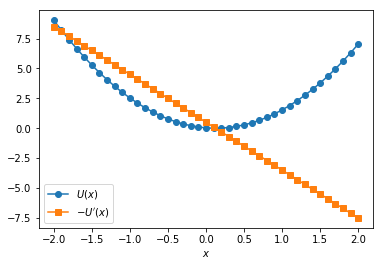

In [2]:
#example - write your own for the double well potential
def get_harmonic_potential(x,A,F,x0):
    potential = A*((x-x0)**2) - F*x
    potential = potential - potential.min()
    force = -2*A*(x-x0) + F
    return potential,force

dx = 0.1
xmin = -2
xmax = 2
xpoints = np.arange(xmin,xmax+dx,dx)
my_A = 2
my_F = 0.5
my_x0 = 0

p_harmonic,f_harmonic = get_harmonic_potential(xpoints,my_A,my_F,my_x0)
plt.plot(xpoints,p_harmonic,label="$U(x)$",marker='o')
plt.plot(xpoints,f_harmonic,label="$-U'(x)$",marker='s')
plt.xlabel("$x$")
plt.legend()
    

# Problem 2.2 - Initial density (20 points)
## The starting probability density for our system will be a gaussian centered at a point $x_0$ with standard deviation $\sigma$. Fill in the function "gaussian" below to return the values of this gaussian at the points xpoints that you used to compute your potential

In [3]:
def gaussian(x,x0,sigma):
    values = ""
    return values

density_center = 0
sigma = 0.1
initial_density = gaussian(xpoints,density_center,sigma)

# Problem 2.3 - Evolving the Smoluchowski equation (75 points)
## In this problem you have to solve the Smoluchowski equation at a discrete set of time points. You can make $k_B T=1$ and $D=1$ if you want.
## The Smoluchowski equation is: $ \frac{\partial f(x,t) }{\partial t} = D \frac{\partial}{\partial x} \left [ e^{-\beta U(x)} \frac{\partial}{\partial x} e^{\beta U(x)} f(x,t) \right] \equiv g(x,t)$

## There are several ways to do this. One way is
## 1) Given the current density $f(x,t_0)$, compute the right hand side g(x,t). To compute the derivatives, use np.gradient
## 2) Compute $f(x,t_0+dt) = f(x,t_0) + dt g(x,t_0) $
## 3) Repeat step 2 until it looks like the potential has converged
### Note that step 2 comes from the first order Taylor series expansion, and is called Euler's method. It is not a very good method numerically, but will work okay here for a small timestep. 
### If you want, you can instead use something fancier like scipy.integrate.solve_ivp

## ** Write a function to perform these updates, and plot the result versus time, with an initial guess of a Gaussian centered at 0. The final result might look like the following:
![rho_v_time](example_figures/rho_v_time_euler.png)


# Problem 2.4 - Convergence of the density $f(x,t)$ (50 pts)
### In the limit of large times, $\lim_{t->\infty} f(x,t) = P(x)$ where $P(x)$ is the probability of seeing $x$ in the canonical distribution
### 1) What is the formula for P(x) in this case?
### 2) Compute P(x) numerically for this potential on the same x-points (don't forget the normalization constant)
### 3) Plotting your final f(x,t) and P(x) on top of eachother. Is your integration converged? If not, run the previous step for longer
### 4) Make another plot of density at different times starting with an initial gaussian centered at $-x_0$ instead of 0. What can you say about the convergence in this case versus the one centered at 0? Why?



# Problem 2.5 - Rate versus force (100 points)
### In our final lecture, Erik derived the following formula for the first passage time from bin $A$ to bin $B$
### $\tau_{A\rightarrow B} \approx \frac{1}{D} \int_{x_a}^{x_b} dy \left [ e^{\beta U(y)} \int_{-\infty}^{y} dz e^{-\beta U(z)} \right ]$
### 1) Make a loop that computes the potential for different values of external force $F$, which I'll call $U_F(x)$. The range of forces you choose can go from $-F_{max}$ to $F_{max}$, where $F_{max}$ is big enough to show something interesting but not so big that the barrier totally vanishes 
### 2) Write a function that finds the position of the left minimum ("$x_a$"), the right minimum ("$x_b$"), and the barrier peak position ("$x_p$"). Make a plot of barrier height for going from A->B vs force, where barrier height $U^\ddagger(F)=U_F(x_p)-U_F(x_a)$.
### 3) Using this function, plot all the potentials with the minimum energy shifted to be $U(x_a)$ for that particular value of $F$. It should look something like this:
![potential_F_minxa](example_figures/potential_F_minxa.png)
### 4) Apply the formula above to compute $\tau_{A\rightarrow B}(F)$. Plot $\tau_{A\rightarrow B}(F)$ vs $U^\ddagger(F)$. Does this curve follow Arrhenius rate theory (remember the rate $k=1/\tau$)? Why or why not? (Hint, consider plotting $\log(\tau))$
### 5) Compute the Kramer's prediction for $\tau_{A->B}(F)$ numerically. For a particle of mass 1, (and as you can see in the above pdf reference), $\tau_{kramers}=\frac{2\pi}{\omega_a \omega_p D \beta}e^{\beta U^\ddagger}$, where $\omega_a=\sqrt{\left| \frac{d^2 U(x_a)}{d x^2} \right|}$ and similarly for $x_p$. You can compute this second derivative exactly from the original formula for U, or you can use np.gradient on the numerical result for the force, i.e. $\frac{d^2 U(x_a)}{d x^2}=-\frac{d F}{d x}$.

### 6) Plot the Kramer's $\tau(F)$ versus barrier height on top of the Smoluchowski data. Where does it deviate and why? It might look something like
![rate_vs_barrier](example_figures/compare_rate_vs_barrier.png)


### 7) In biology, there is a formula called Bell's law which says that the lifetime of a bond between two proteins can be expressed as $\tau_{Bells}(F) = \tau(F=0) e^{-\beta F d^\ddagger}$. In other words, when you pull on the two proteins they fall apart exponentially faster. Here $d^\ddagger$ is the "distance" from the minimum to the transition state. This formula comes from the idea of our double well potential, and here $d^\ddagger=x_p-x_a$.
### Compute $\tau_{Bells}(F)$ vs $F$ on top of the Smoluchowski $\tau$. Does Bell's law hold? The plot might look something like below, and the x-axis may depend on what you defined as a positive or negative force
![rate_vs_force](example_figures/compare_rate_vs_force_bells.png)